This notebook contains the project for Complex system simulation, Complex financial networks

In [11]:
# imports
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
import math
import sys
import os
import time
import datetime
import pickle
import argparse
import itertools
from typing import Dict, List, Any, Tuple
import doctest
import pandas as pd
import powerlaw
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D
import custom_functions as cm

# Testing Functions notebook


This notebook is used to test function and make sure they perform as expected



### Testing the Graph creation function

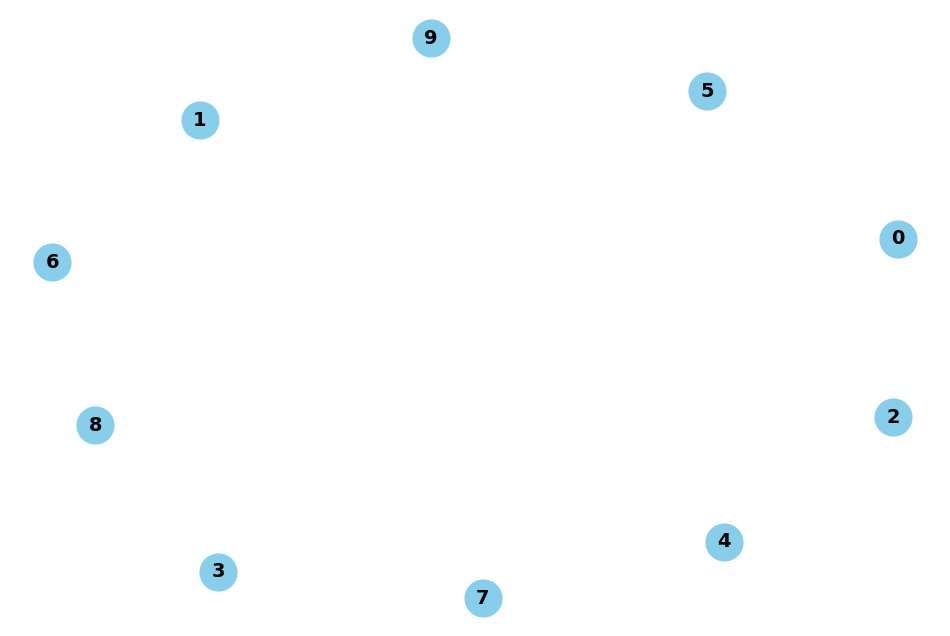

In [12]:
# Params
Nodes = 10
edges = None

graph = cm.create_directional_graph(Nodes, edges)
cm.draw_graph_with_edge_weights(graph)

### Testing the linking threshold

In [13]:
# parameters
N = 4 # Number of agents (nodes)
time_steps = 5  # Number of time steps to simulate

In [14]:
# Test the functions    
Graph_updated = cm.create_directional_graph(N)
initial_exposures = cm.generate_exposures(N)
for t in range(time_steps):
    print('timestep', t)
    Graph_updated = cm.form_links_and_update_exposures(G=Graph_updated, linking_threshold=0.5)
    exposures_updated = cm.form_links_and_update_exposures(G=Graph_updated, linking_threshold=0.5)
    print(exposures_updated)

timestep 0
DiGraph with 4 nodes and 8 edges
timestep 1
DiGraph with 4 nodes and 8 edges
timestep 2
DiGraph with 4 nodes and 8 edges
timestep 3
DiGraph with 4 nodes and 8 edges
timestep 4
DiGraph with 4 nodes and 8 edges


In [15]:
nx.adjacency_matrix(Graph_updated).todense()

array([[ 0.        ,  0.12296673,  0.        ,  0.5100835 ],
       [-0.12296673,  0.        ,  0.9449577 ,  0.        ],
       [ 0.        , -0.9449577 ,  0.        , -0.12296673],
       [-0.5100835 ,  0.        ,  0.12296673,  0.        ]])

In [16]:
draw_graph_with_edge_weights(Graph_updated)

NameError: name 'draw_graph_with_edge_weights' is not defined

In [ ]:
# Ensure N and time_steps are defined
N = 4  # Number of nodes
time_steps = 5  # Number of time steps

# Initialize the graph and exposures
Graph_updated = cm.create_directional_graph(N)
initial_exposures = [Graph_updated.nodes[i]['exposure'] for i in Graph_updated.nodes]

for t in range(time_steps):
    print('timestep', t)
    Graph_updated = cm.form_links_and_update_exposures(G=Graph_updated, linking_threshold=0.5)

    # Print the current state of the graph
    print(len(Graph_updated.edges()), 'edges')
    print('Current exposures:', [Graph_updated.nodes[i]['exposure'] for i in Graph_updated.nodes])

# Print initial exposures
print('initial_exposures:\n', initial_exposures)

# Generate a weighted adjacency matrix
weighted_adj_matrix = nx.adjacency_matrix(Graph_updated, weight='weight').todense()
print('\nAdjacency matrix: \n', weighted_adj_matrix)

timestep 0
0 edges
Current exposures: [-2.8345265143509835, -2.0864214056714547, -0.7633595557197425, -1.827717886290496]
timestep 1
0 edges
Current exposures: [-2.8345265143509835, -2.0864214056714547, -0.7633595557197425, -1.827717886290496]
timestep 2
0 edges
Current exposures: [-2.8345265143509835, -2.0864214056714547, -0.7633595557197425, -1.827717886290496]
timestep 3
0 edges
Current exposures: [-2.8345265143509835, -2.0864214056714547, -0.7633595557197425, -1.827717886290496]
timestep 4
0 edges
Current exposures: [-2.8345265143509835, -2.0864214056714547, -0.7633595557197425, -1.827717886290496]
initial_exposures:
 [-2.8345265143509835, -2.0864214056714547, -0.7633595557197425, -1.827717886290496]

Adjacency matrix: 
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


Number of links at threshold 0.0: 0
Number of links at threshold 0.1: 2
Number of links at threshold 0.2: 2
Number of links at threshold 0.3: 2
Number of links at threshold 0.4: 2
Number of links at threshold 0.5: 2
Number of links at threshold 0.6: 2
Number of links at threshold 0.7: 2
Number of links at threshold 0.8: 2
Number of links at threshold 0.9: 2


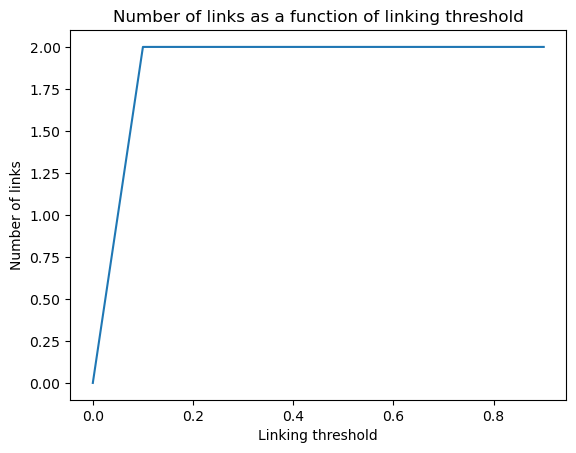

In [ ]:
# This cell is purely for testing expected behavior, we expect the number of links to go up as the linking threshold decreases
Graph = cm.create_directional_graph(N_Nodes = 10)
Links_test = []
Link_test_thresholds = []

for i in range(10):
    Graph_updates = cm.form_links_and_update_exposures(G=Graph, linking_threshold=i/10)
    print(f'Number of links at threshold {i/10}: {len(Graph_updates.edges)}')
    Links_test.append(len(Graph_updates.edges))
    Link_test_thresholds.append(i/10)
plt.ylabel('Number of links')
plt.xlabel('Linking threshold')
plt.title('Number of links as a function of linking threshold')
plt.plot(Link_test_thresholds, Links_test)
plt.show()


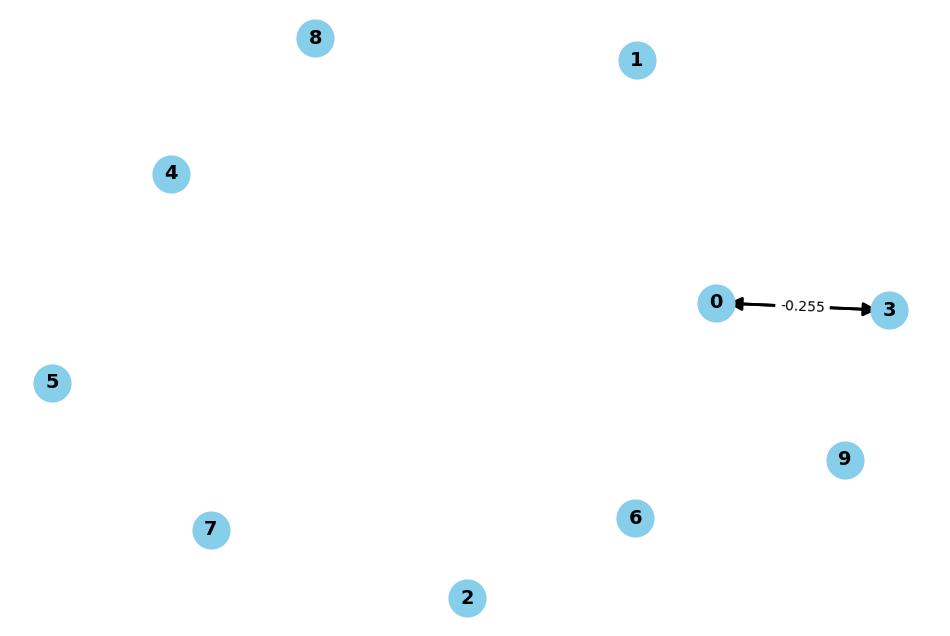

In [ ]:
# Amount of links looks to be the same as expected, considering that the links go times 2 because the directional nature of the graph

cm.draw_graph_with_edge_weights(Graph_updates)

### Testing the logistic threshold

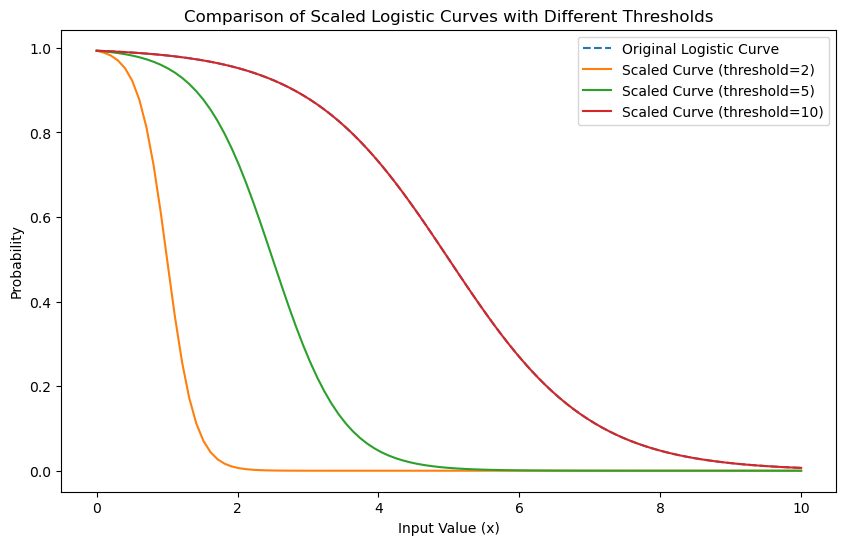

In [ ]:
def logistic_threshold_probability(x, threshold):
    """
    Compute the logistic threshold probability with fixed 'a' and 'b' values.

    Parameters:
    x (float): The value at which to compute the probability.
    threshold (float): The threshold value for scaling.

    Returns:
    float: The logistic threshold probability.
    """
    a = 1
    b = 5
    scaled_x = x * (10 / threshold)
    return 1 - 1 / (1 + np.exp(-a * (scaled_x - b)))

def original_logistic(x, a, b):
    return 1 - 1 / (1 + np.exp(-a * (x - b)))

plt.figure(figsize=(10, 6))

x_range = np.linspace(0, 10, 100)

plt.plot(x_range, original_logistic(x_range, 1, 5), label='Original Logistic Curve', linestyle='--')

thresholds = [2, 5, 10]

for threshold in thresholds:
    ys = logistic_threshold_probability(x_range, threshold)
    plt.plot(x_range, ys, label=f'Scaled Curve (threshold={threshold})')

plt.xlabel('Input Value (x)')
plt.ylabel('Probability')
plt.title('Comparison of Scaled Logistic Curves with Different Thresholds')
plt.legend()

plt.show()

### Testing the 'form_links_and_update_exposures' function

In [ ]:
cm.test_bankruptcy_and_exposure_update()

expected_exposure: 8
actual_exposure: -4


AssertionError: 

In [ ]:
cm.test_maturity_0_and_exposure_update()

expected_exposure_node0: 1


KeyError: 0

cm.test_maturity_0_and_exposure_update

# Test Run

In [ ]:
# Parameters for the simulation
N_agents = 100
time_steps = 2000# Number of simulation steps
delta_t = 0.01  # Time increment for Brownian motion
sigma_exposure_node = 2  # Standard deviation for Brownian motion
sigma_intrestrate = 20
threshold_v = 2  # Bankruptcy threshold
linking_threshold = 1 # Threshold for forming links
swap_exposure_threshold = 0.5
Node_creation_mode = True
time_to_maturity = 500
link_threshold_mode = 'hard cutoff'
# link_threshold_mode = 'logistic'



# running time 1 pass with these params: 900 seconds

# Running the simulator
graph, exposures_over_time, num_bankrupt_agents_over_time, simulated_prices, links_over_time, total_abs_exposure_in_edge_weights, node_population_over_time = cm.financial_network_simulator(N_agents = N_agents, time_steps = time_steps, sigma_exposure_node = sigma_exposure_node, sigma_intrestrate = sigma_intrestrate, delta_t = delta_t, threshold_v = threshold_v, linking_threshold = linking_threshold, swap_exposure_threshold = swap_exposure_threshold, time_to_maturity = time_to_maturity , link_threshold_mode = link_threshold_mode)
# graph, exposures_over_time, num_bankrupt_agents_over_time, simulated_prices, links_over_time, total_abs_exposure_in_edge_weights, node_population_over_time = financial_network_simulator(N_agents = N_agents, num_steps = num_steps, sigma_exposure_node = sigma_exposure_node, sigma_intrestrate = sigma_intrestrate, delta_t = delta_t, threshold_v = threshold_v, linking_threshold = linking_threshold)

timestep 0
timestep 1
timestep 2
timestep 3
timestep 4
timestep 5
timestep 6
timestep 7
timestep 8
timestep 9
timestep 10
timestep 11
timestep 12
timestep 13
timestep 14
timestep 15
timestep 16
timestep 17
timestep 18
timestep 19
timestep 20
timestep 21
timestep 22
timestep 23
timestep 24
timestep 25
timestep 26
timestep 27
timestep 28
timestep 29
timestep 30
timestep 31
timestep 32
timestep 33
timestep 34
timestep 35
timestep 36
timestep 37
timestep 38
timestep 39
timestep 40
timestep 41
timestep 42
timestep 43
timestep 44
timestep 45
timestep 46
timestep 47
timestep 48
timestep 49
timestep 50
timestep 51
timestep 52
timestep 53
timestep 54
timestep 55
timestep 56
timestep 57
timestep 58
timestep 59
timestep 60
timestep 61
timestep 62
timestep 63
timestep 64
timestep 65
timestep 66
timestep 67
timestep 68
timestep 69
timestep 70
timestep 71
timestep 72
timestep 73
timestep 74
timestep 75
timestep 76
timestep 77
timestep 78
timestep 79
timestep 80
timestep 81
timestep 82
timestep 83
ti

# Visual tests of network behavior

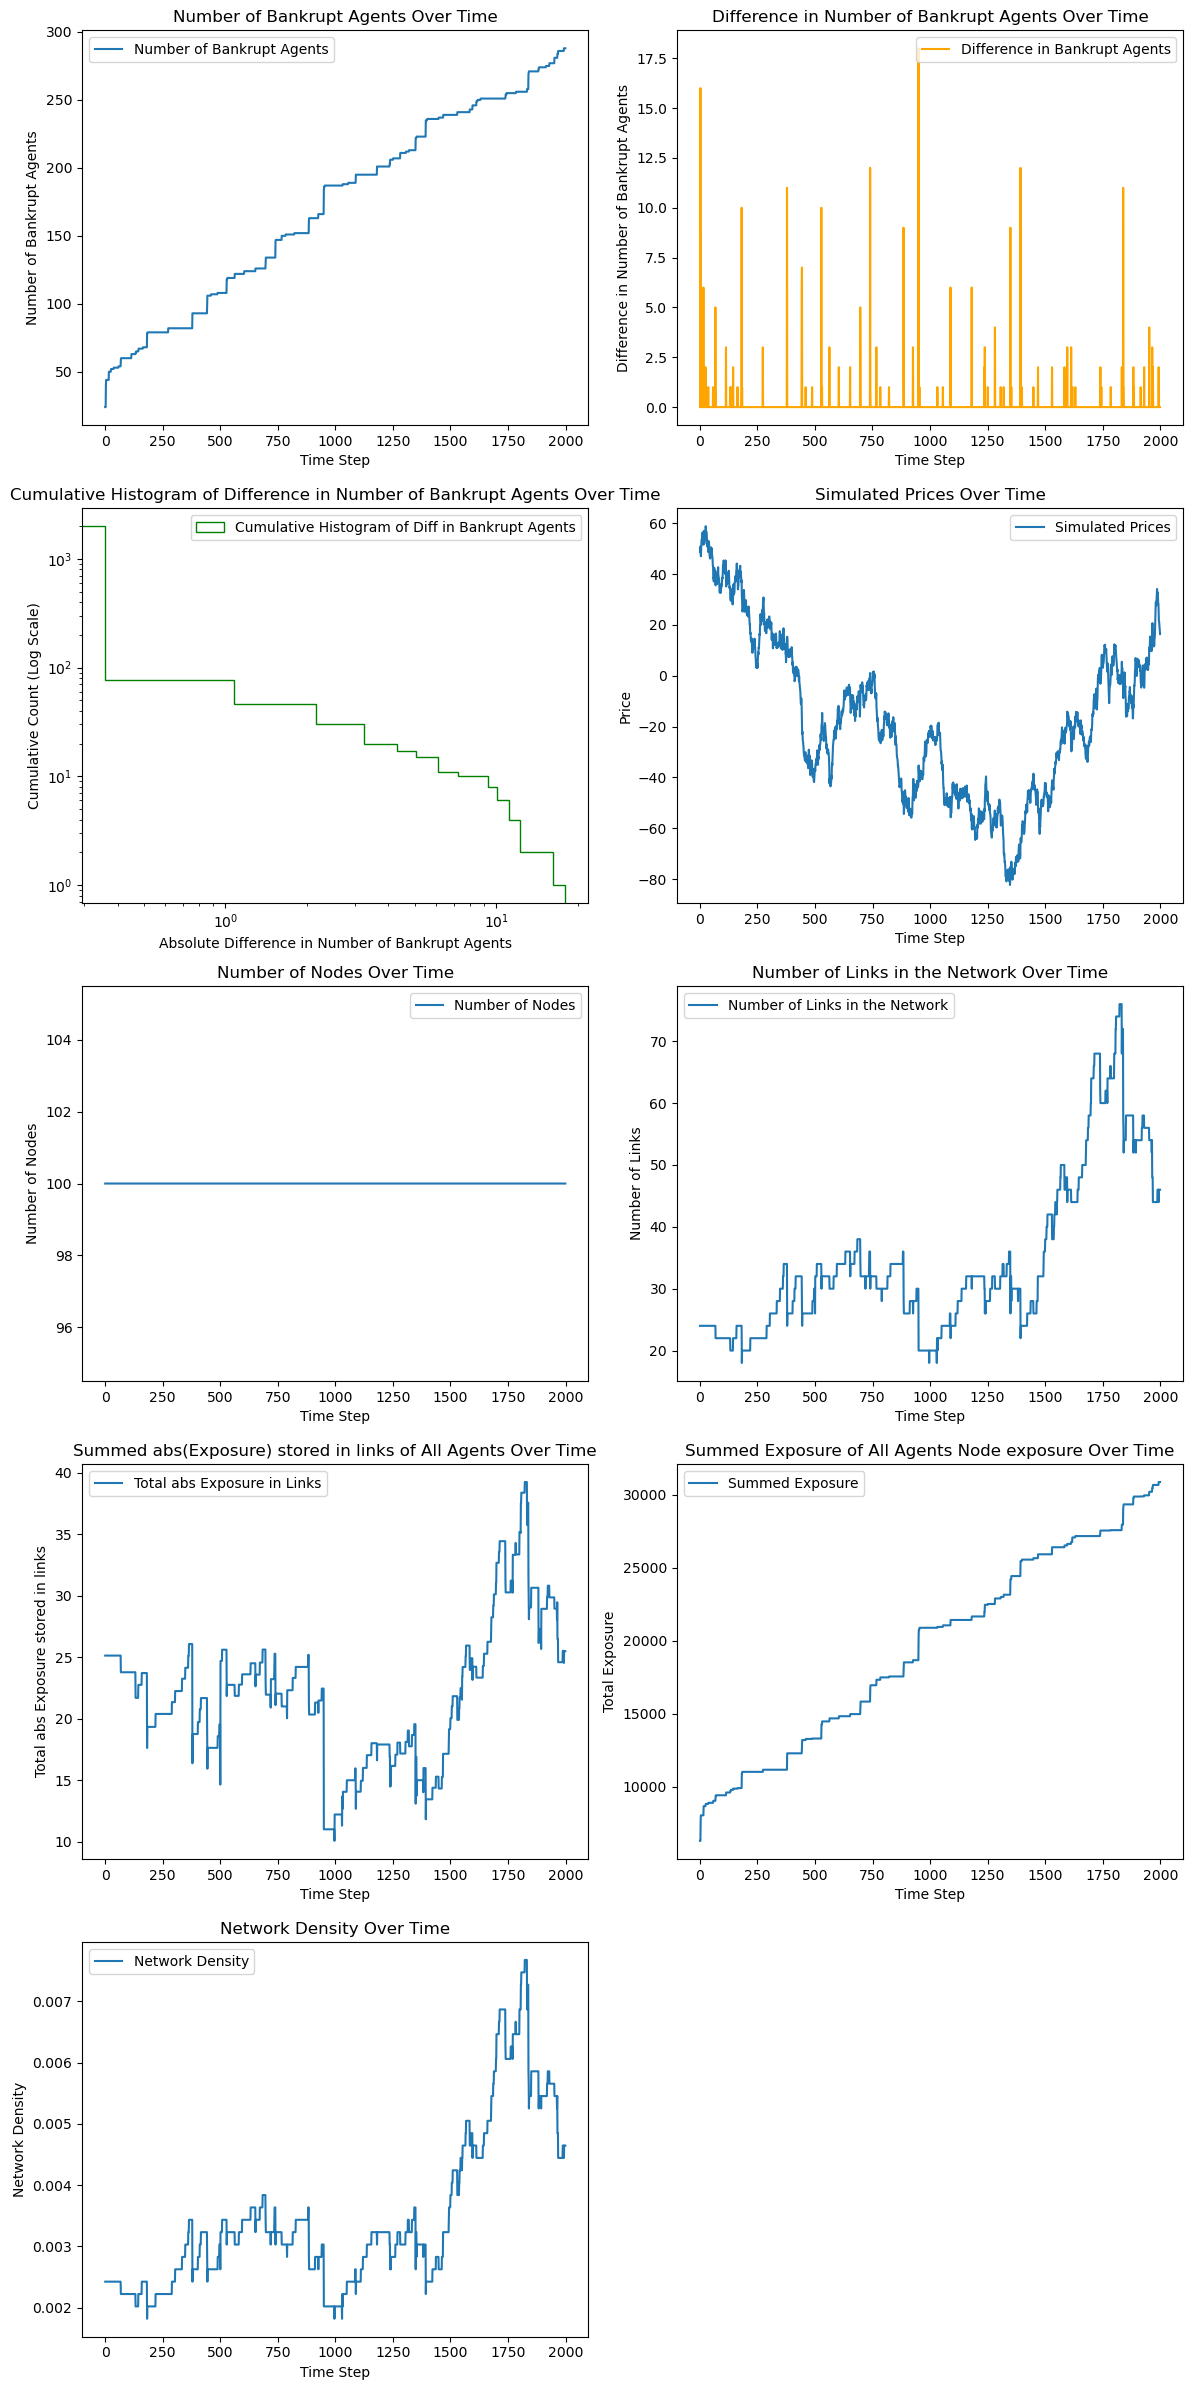

In [ ]:
# params plotting
time_steps = 2000

cm.plot_financial_network_results(time_steps, num_bankrupt_agents_over_time, node_population_over_time, links_over_time, total_abs_exposure_in_edge_weights, exposures_over_time, simulated_prices)